## Unit Testing

In [1]:
import numpy as np
import pandas as pd

### Prediction Model

In [2]:
def pred(X,w,b):
    y_pred = np.dot(X,w)+b
    return y_pred

### Cost Function

In [3]:
def compute_cost(X,y,w,b):

    m,n = X.shape
    sum_cost = 0

    y_pred = pred(X,w,b)
    cost = (y_pred - y)**2

    for i in range(m):
        sum_cost+= cost[i]
    
    total_cost = (sum_cost)/(2*m)
    return total_cost

In [4]:
# Dummy Data
X = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12]])
y = np.array([[20],[30],[40],[45]])
w_init = np.array([[0],[1],[3]])
b_init = 0
num_iterations = 10000
alpha = 0.001

cost = compute_cost(X,y,w_init,b_init)
print(cost)


[19.875]


The prediction and cost function are working correctly

------

### Derivatives (Gradient Descent)

In [5]:
def deriv(X,y,w,b):
    m,n = X.shape
    sum_cost_w =  np.zeros((n,1))
    sum_cost_b = 0

    y_pred = pred(X,w,b)
    cost = (y_pred - y)
    
    for i in range(m):
        for j in range(n):
            sum_cost_w[j] += cost[i] * X[i,j]
        
        sum_cost_b += cost[i]
    
    dj_dw = sum_cost_w/m
    dj_db = sum_cost_b/m
    
    return dj_dw, dj_db

    

In [6]:
dj_dw, dj_db = deriv(X,y,w_init,b_init)
print(dj_dw)
print(dj_db)

[[-13.  ]
 [-17.75]
 [-22.5 ]]
[-4.75]


The gradient(derivative) is working correctly

-------

### Gradient Descent

In [7]:
import math

def gradient(X,y,w,b,alpha,num_iterations):

    J_history = []

    for i in range(num_iterations): 
        dj_dw, dj_db = deriv(X,y,w,b)

        w = w - alpha * dj_dw               
        b = b - alpha * dj_db    

        if i<100000:      # prevent resource exhaustion 
            J_history.append(compute_cost(X, y, w, b))
        
        if i% math.ceil(num_iterations / 10) == 0:
            print(f"Iteration {i:4d}: Cost {float(J_history[-1]):8.2f}")

    return w,b, J_history


In [8]:
w,b,J_history = gradient(X,y,w_init,b_init,alpha,num_iterations)
print(w,b)

Iteration    0: Cost    18.94
Iteration 1000: Cost     5.51
Iteration 2000: Cost     2.26


C:\Users\ACER\AppData\Local\Temp\ipykernel_7552\3222459118.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Iteration {i:4d}: Cost {float(J_history[-1]):8.2f}")


Iteration 3000: Cost     1.32
Iteration 4000: Cost     1.05
Iteration 5000: Cost     0.97
Iteration 6000: Cost     0.95
Iteration 7000: Cost     0.94
Iteration 8000: Cost     0.94
Iteration 9000: Cost     0.94
[[-4.4908385 ]
 [ 0.61210705]
 [ 6.7150526 ]] [4.10294555]


The Gradient Descent is working correctly

--------

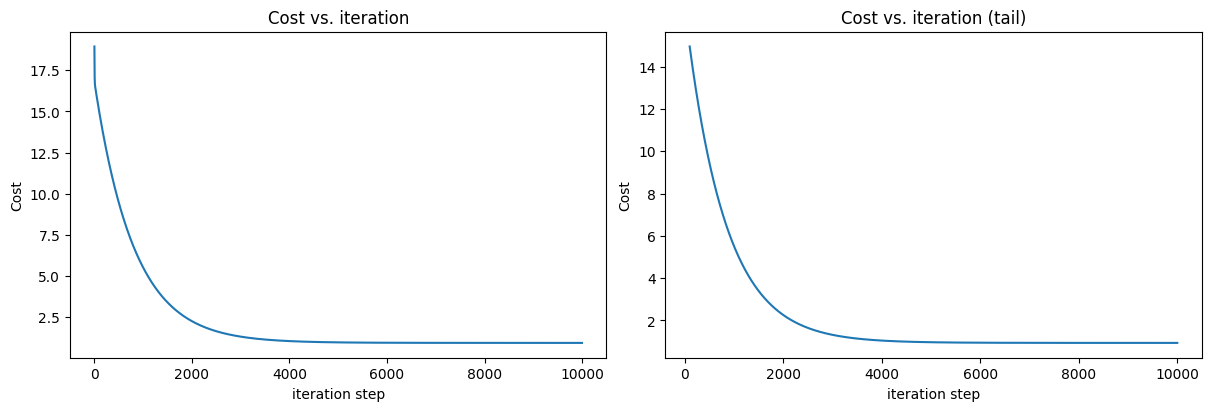

In [9]:
# plot cost versus iteration  
from matplotlib import pyplot as plt


fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_history)
ax2.plot(100 + np.arange(len(J_history[100:])), J_history[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

### Conclusion

Unit Testing is Successfull